 # <p style="padding:10px;background-color:#75C9EF ;margin:10;color:#1a0000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 20px 20px ;overflow:hidden;font-weight:50">Credit Card Default Prediction</p>

 # <p style="padding:10px;background-color:#75C9EF ;margin:10;color:#1a0000;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 20px 20px ;overflow:hidden;font-weight:50">About The Dataset</p>

### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

---------------------------------------------------------------------------------------------------------
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/  her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).
---------------------------------------------------------------------------------------------------------
- X6: The repayment status in September, 2005
- X7: The repayment status in August, 2005
- X8: The repayment status in July, 2005
- X9: The repayment status in June, 2005
- X10: The repayment status in May, 2005
- X11: The repayment status in April, 2005      
The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payent delay for eight months; 9 = payment delay for nine months and above.
---------------------------------------------------------------------------------------------------------
- X12: The amount of bill statement in September, 2005
- X13: The amount of bill statement in August, 2005
- X14: The amount of bill statement in July, 2005
- X15: The amount of bill statement in June, 2005
- X16: The amount of bill statement in May, 2005
- X17: The amount of bill statement in April, 2005      
---------------------------------------------------------------------------------------------------------
- X12: The amount of previous payment in September, 2005
- X13: The amount of previous payment in August, 2005
- X14: The amount of previous payment in July, 2005
- X15: The amount of previous payment in June, 2005
- X16: The amount of previous payment in May, 2005
- X17: The amount of previous payment in April, 2005


#### Life Cycle of Machine Learning Project

* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

 # <p style="padding:10px;background-color:#75C9EF ;margin:10;color:#1a0000;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 20px 20px ;overflow:hidden;font-weight:50">Data Ingestion</p>

#### Importing The Required Packages

In [1]:
 import pandas as pd 
 import numpy as np 
 import seaborn as sns
 import matplotlib.pyplot as plt

In [2]:
# Reading Data From Data Source
df= pd.read_excel("default of credit card clients.xls", skiprows=[0])

 # <p style="padding:10px;background-color:#75C9EF ;margin:10;color:#1a0000;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 20px 20px ;overflow:hidden;font-weight:50">Explorative Data Analysis</p>

In [16]:
# View The First 5 Rows
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [17]:
# View The Last 5 Rows
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [18]:
# Dataset Shape
df.shape

(30000, 25)

#### Insight
There are 30,000 records and 25 columns

In [19]:
# More Info About The Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [21]:
# Statistical Summary Of Dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [22]:
# Checking For Duplicate 
df.duplicated().sum()

0

#### Insight
There are no duplicates.

In [23]:
# Checking For Missing Values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

#### Insight
There are no missing values.

In [25]:
# Checking For No of Unique
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [3]:
# Drop Columns Not Required For Analysis
df.drop("ID", axis=1, inplace=True)

In [4]:
# Create A Copy Of The Dataset
data=df.copy()

 # <p style="padding:10px;background-color:#75C9EF ;margin:10;color:#1a0000;font-family:newtimeroman;font-size:50%;text-align:center;border-radius: 20px 20px ;overflow:hidden;font-weight:50">Univariate Analysis</p>

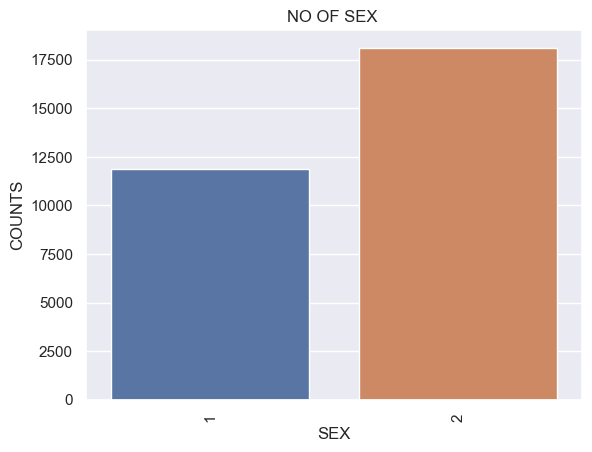

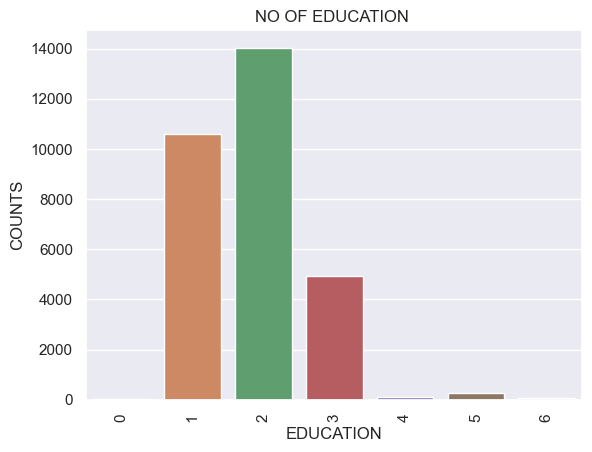

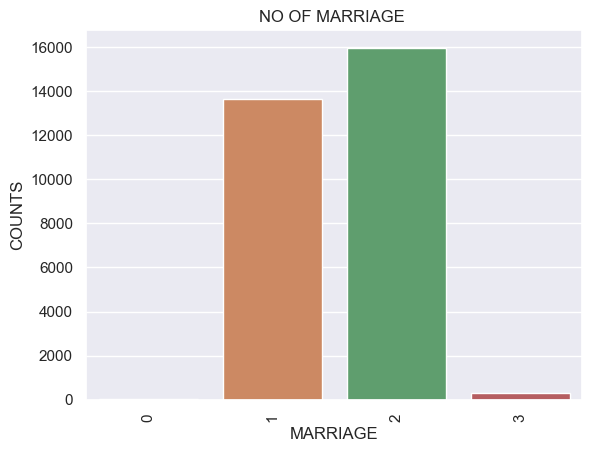

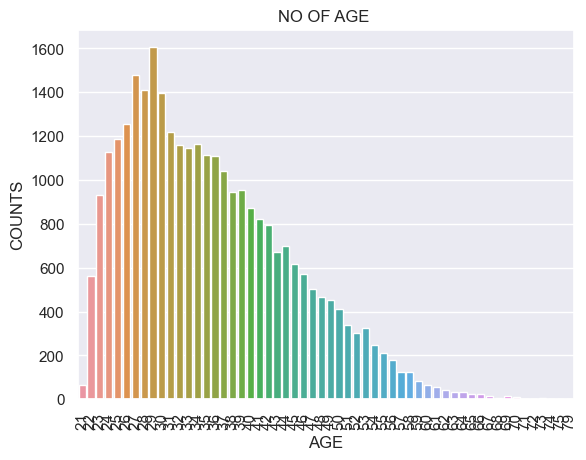

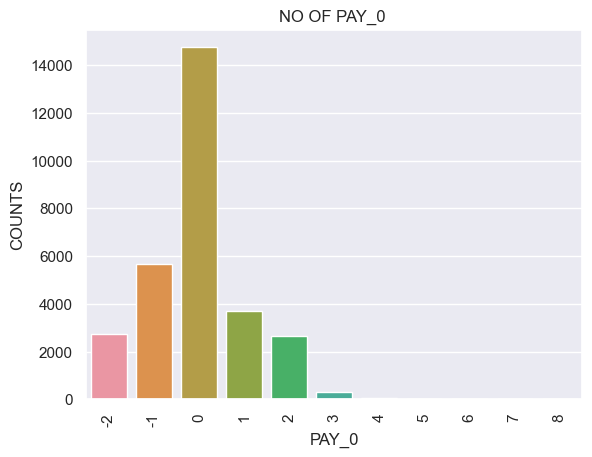

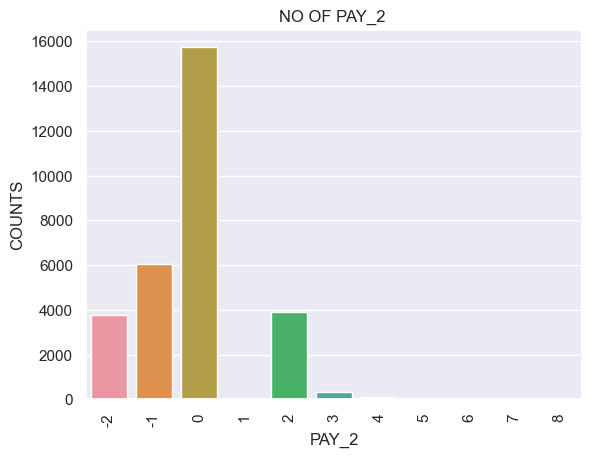

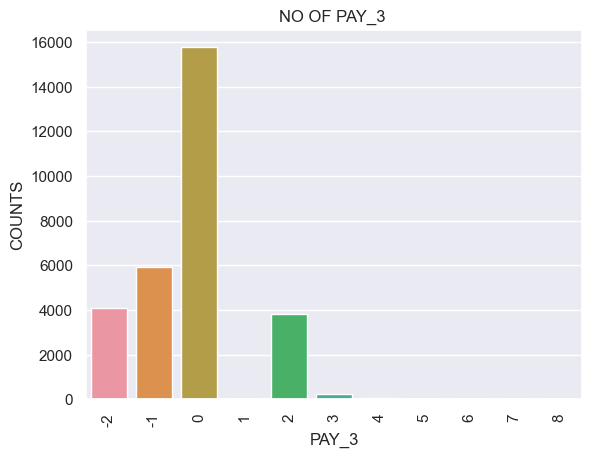

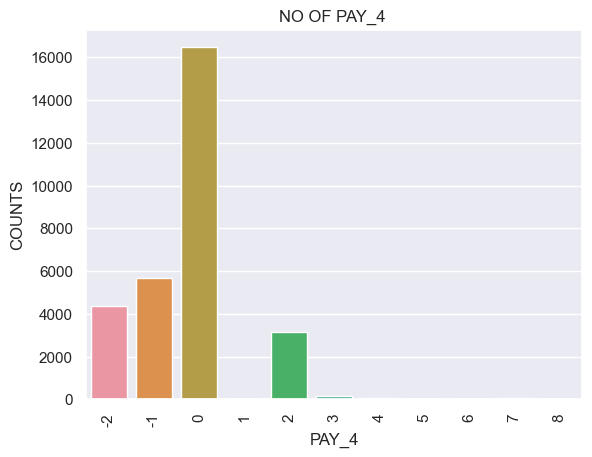

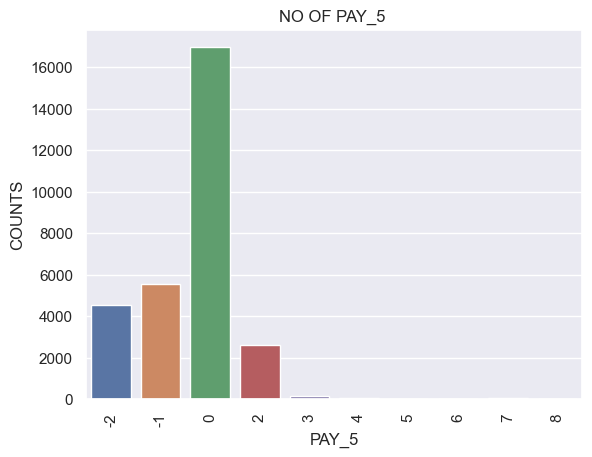

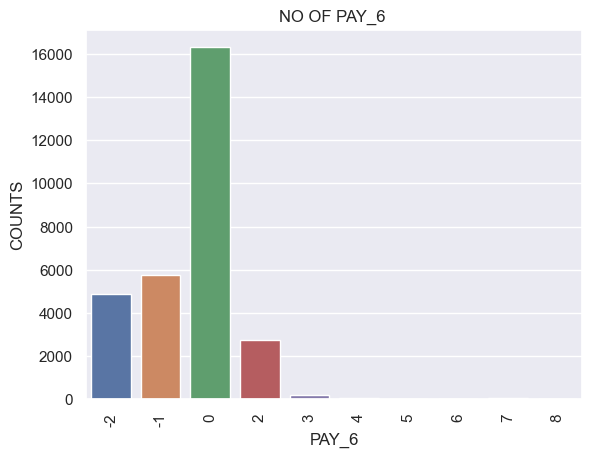

In [57]:
sns.set(style="darkgrid")
for i in data.columns[1:11]:
    sns.countplot(x=i, data=data)
    plt.title(f"NO OF {i} ")
    plt.ylabel("COUNTS")
    plt.xticks(rotation=90)
    plt.show()

#### Checking Data Distribution

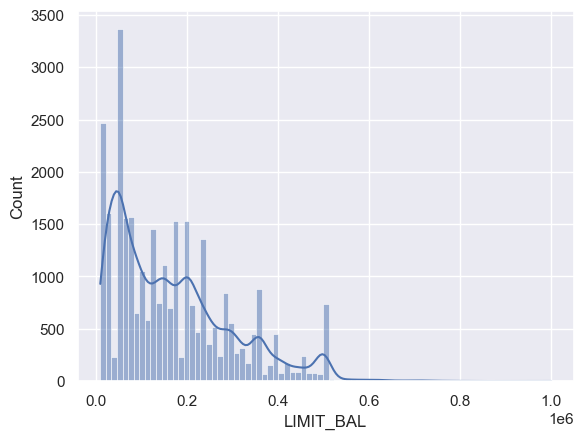

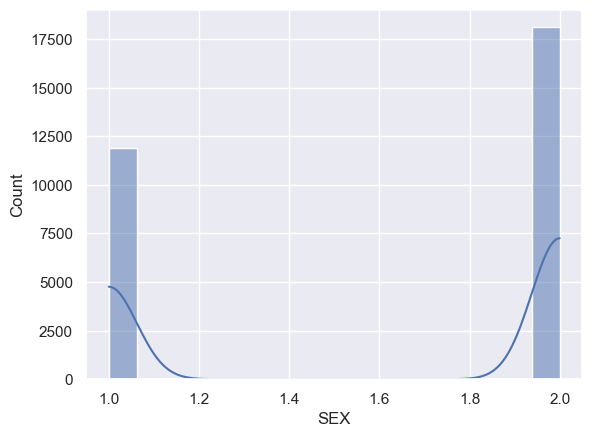

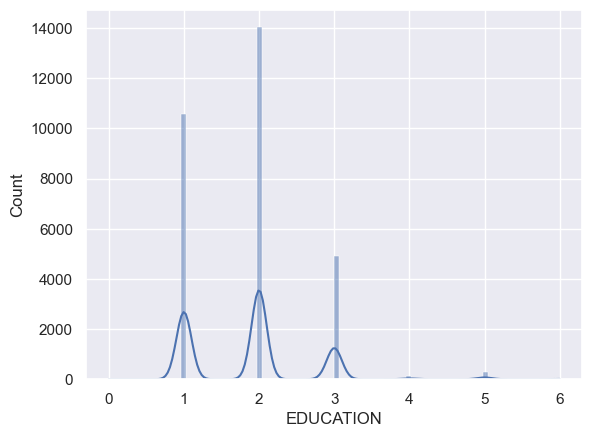

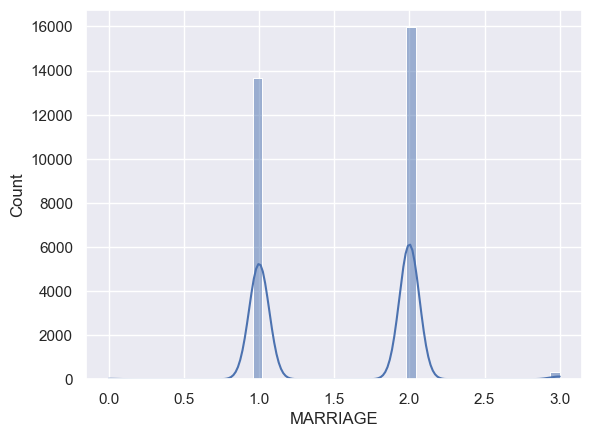

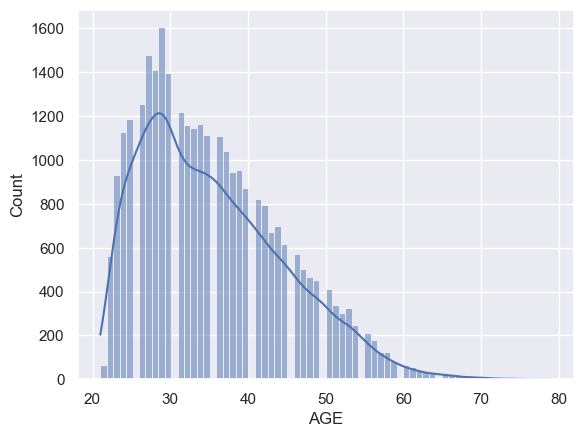

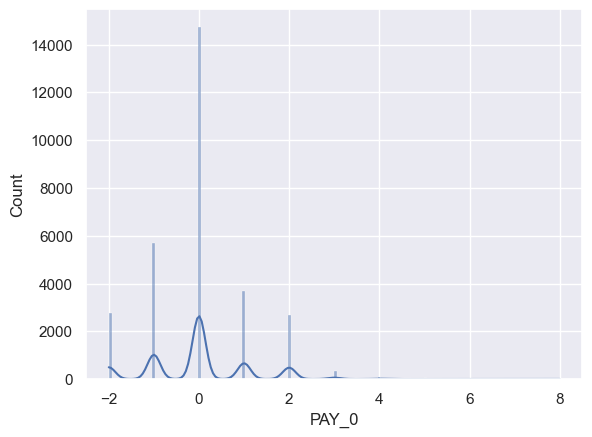

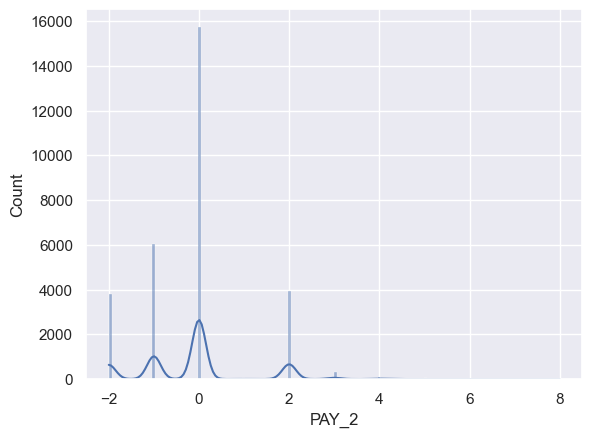

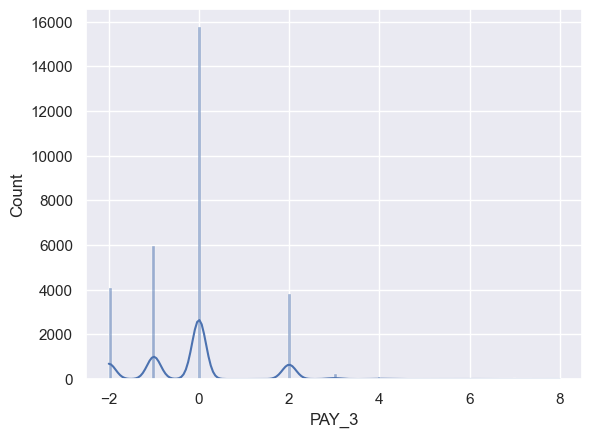

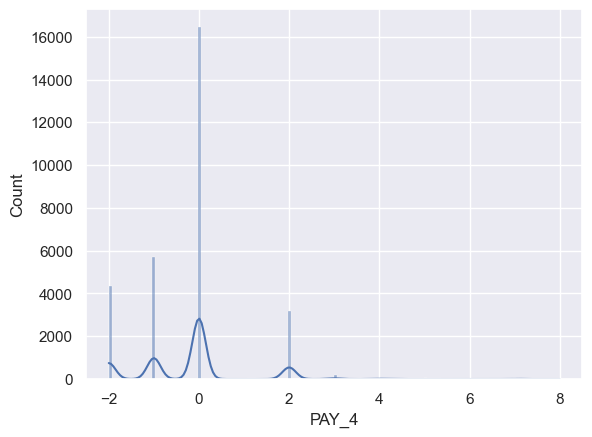

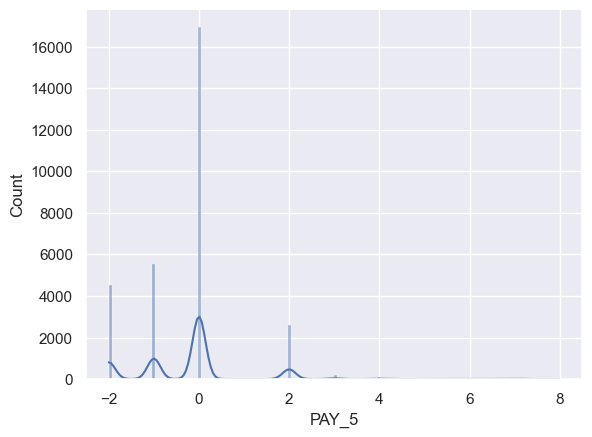

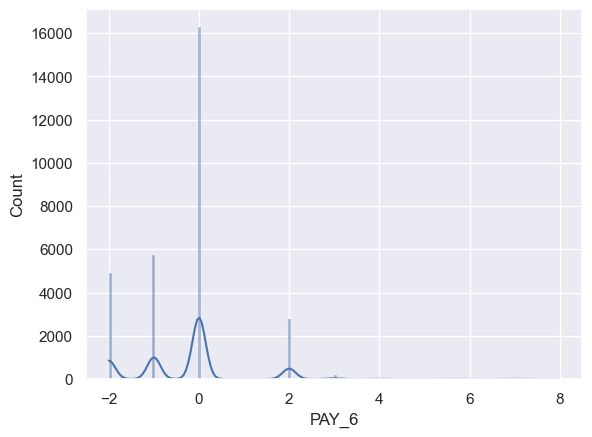

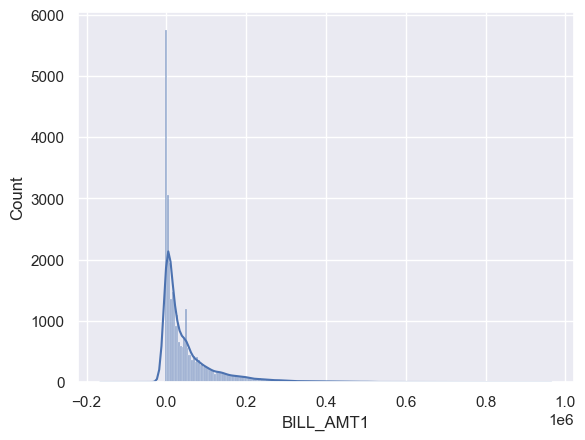

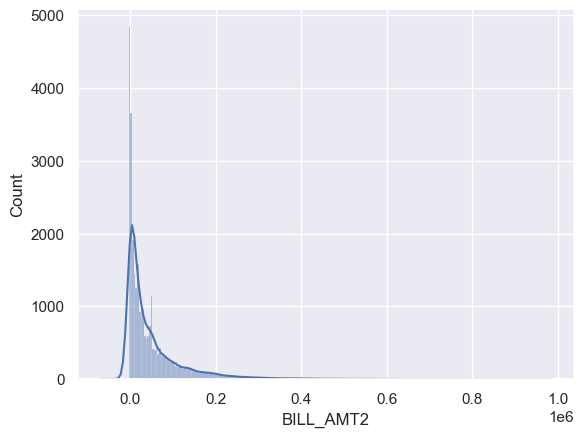

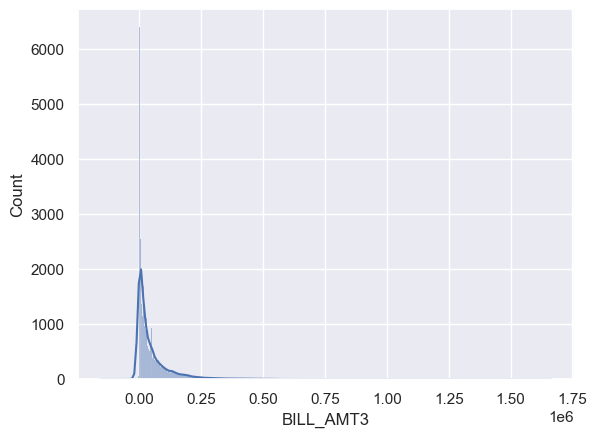

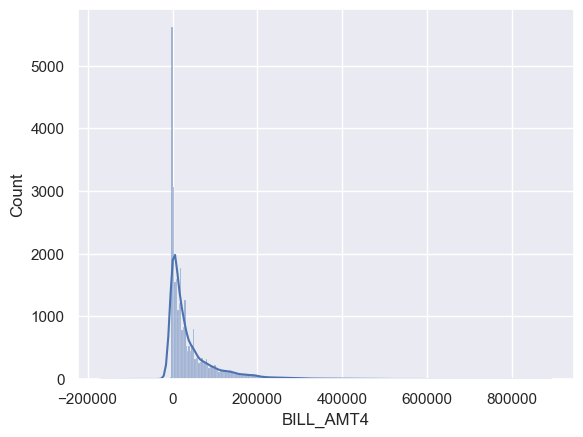

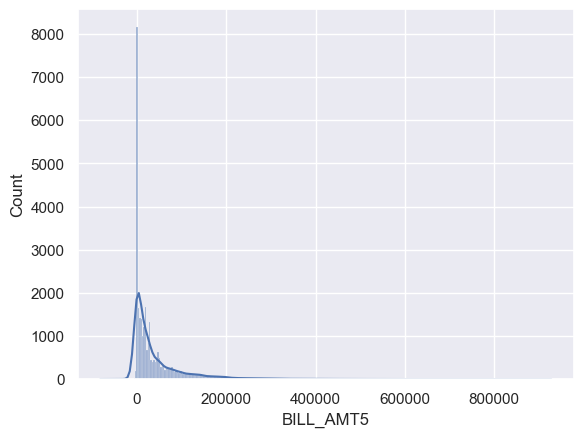

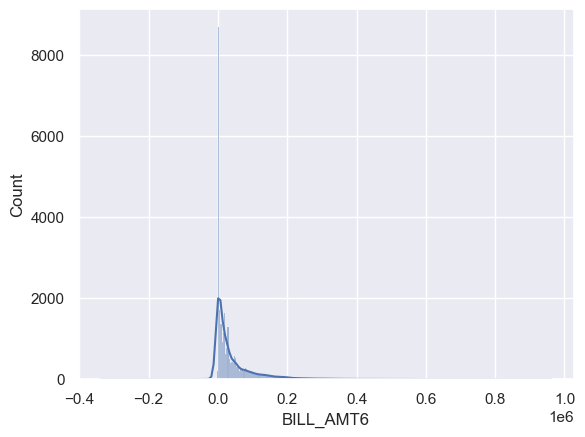

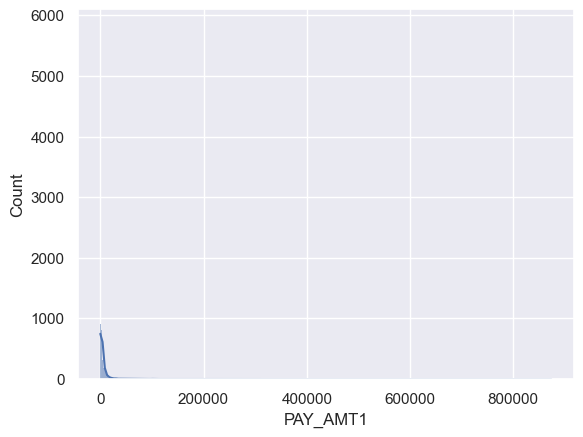

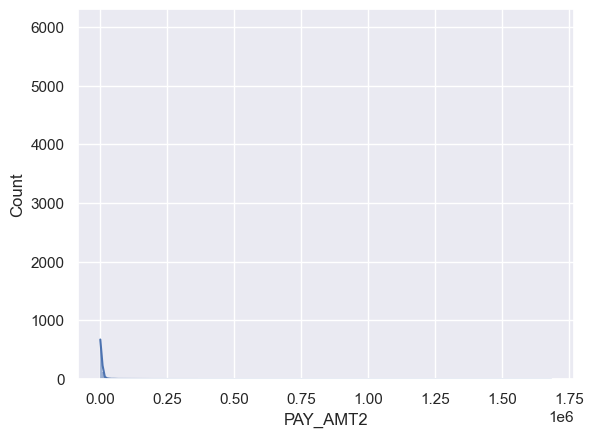

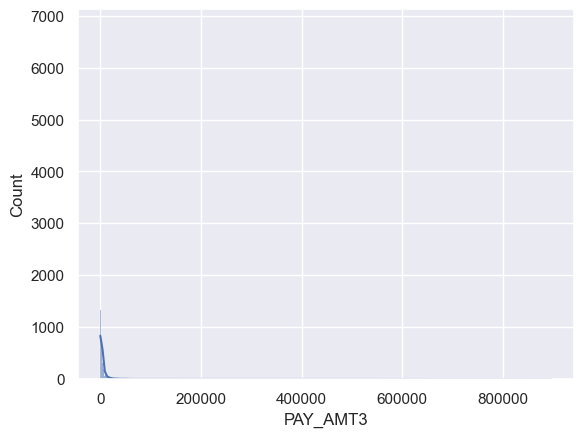

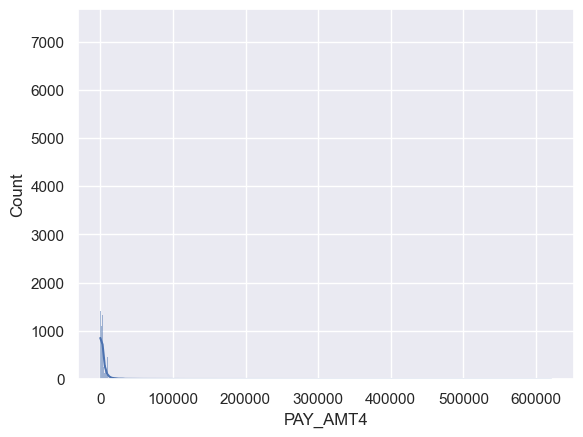

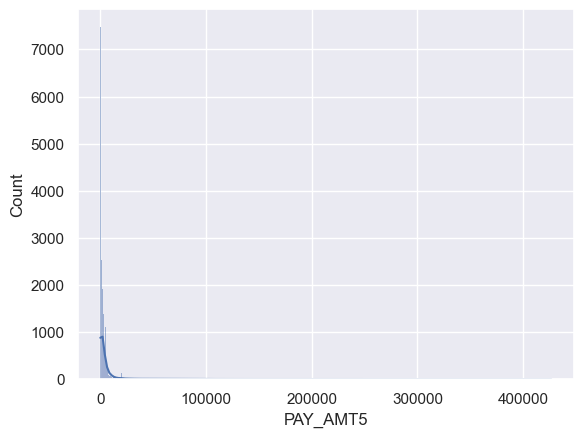

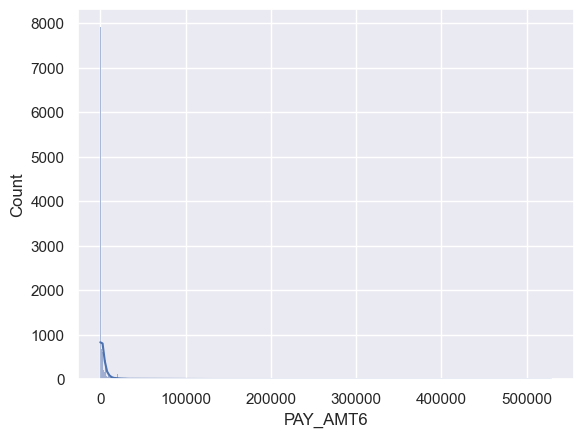

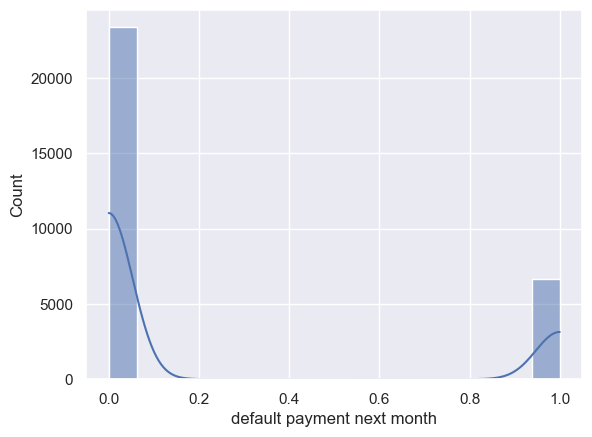

In [60]:
sns.set(style="darkgrid")
for i in data.columns:
    sns.histplot(x=i, data=data, kde=True)
    plt.show()

#### Insight
The data does not follow guassian/normal distribution.

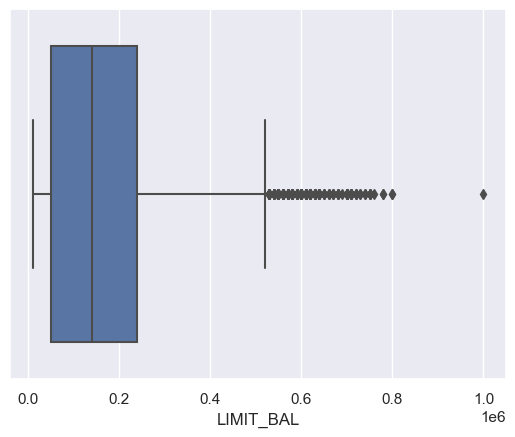

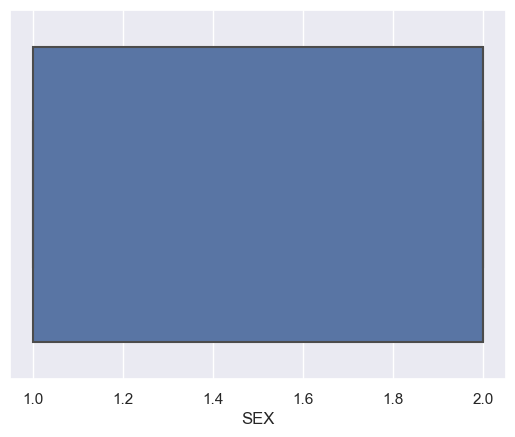

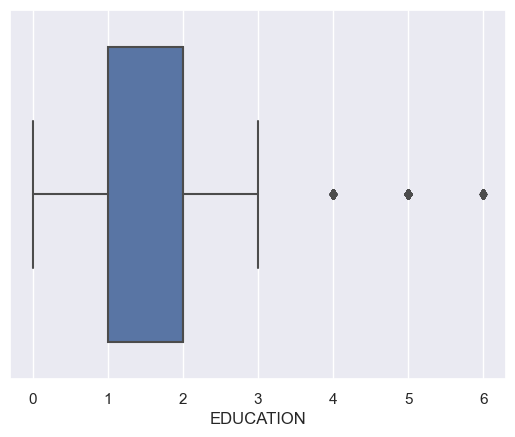

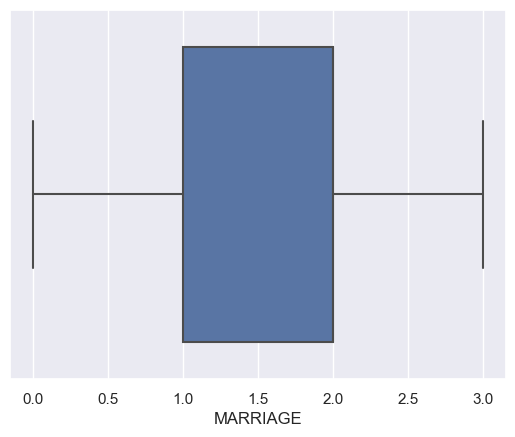

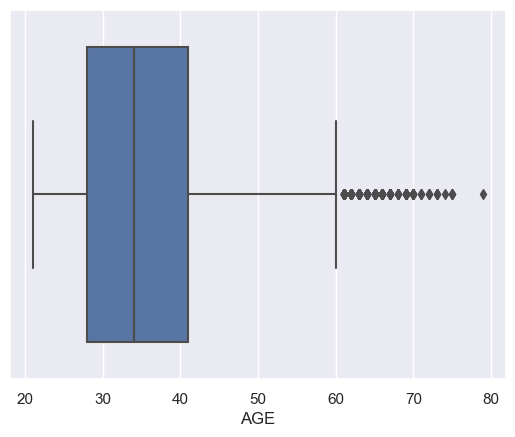

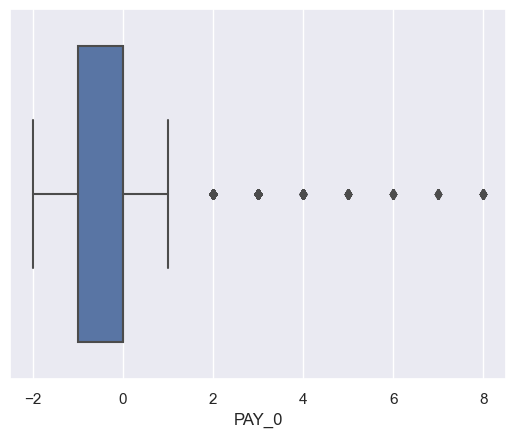

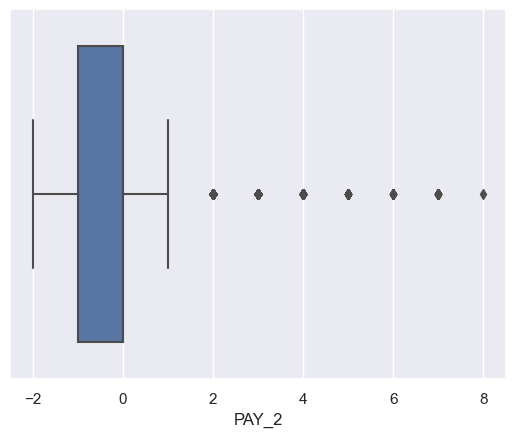

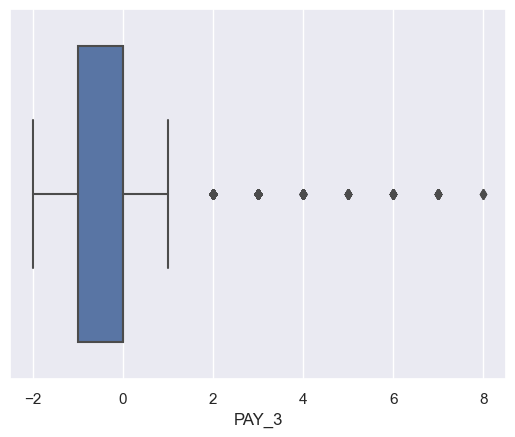

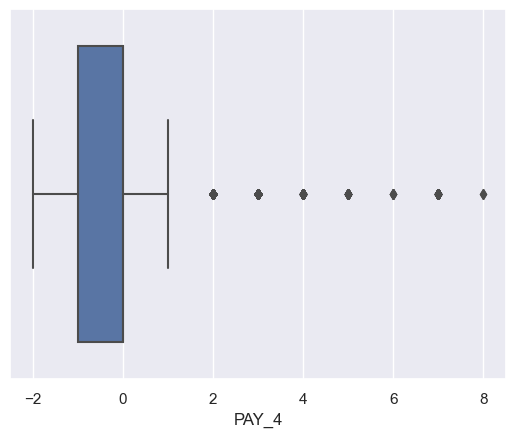

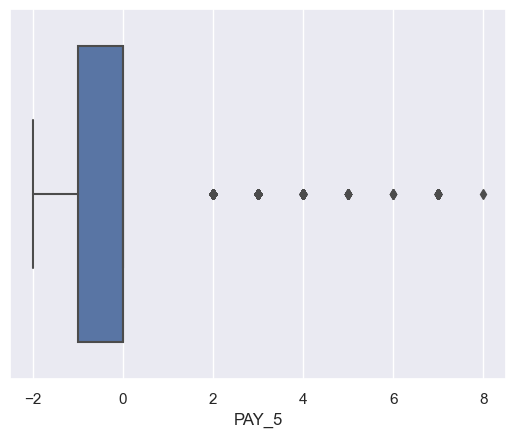

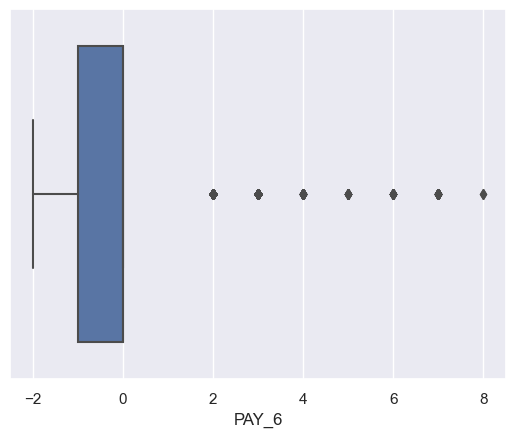

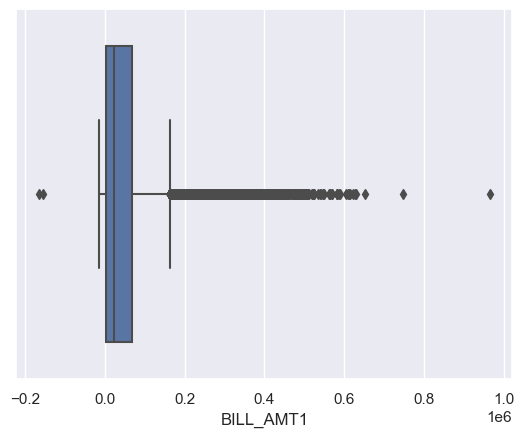

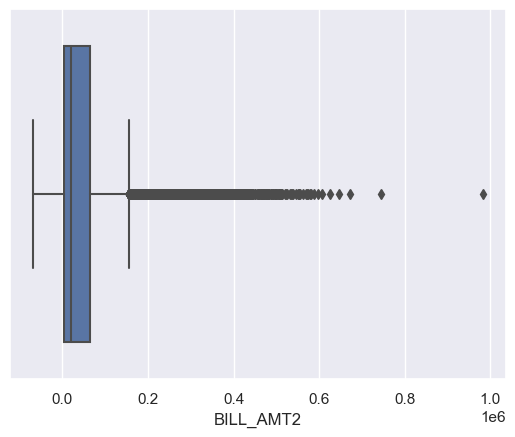

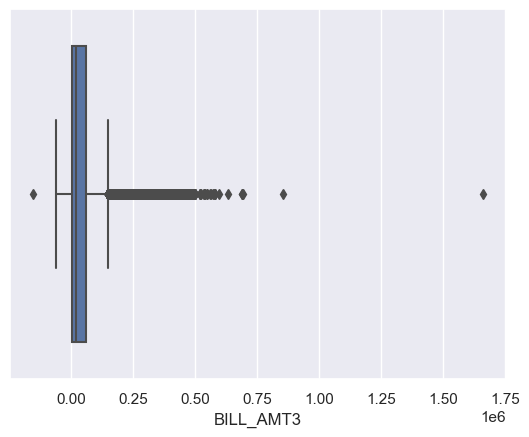

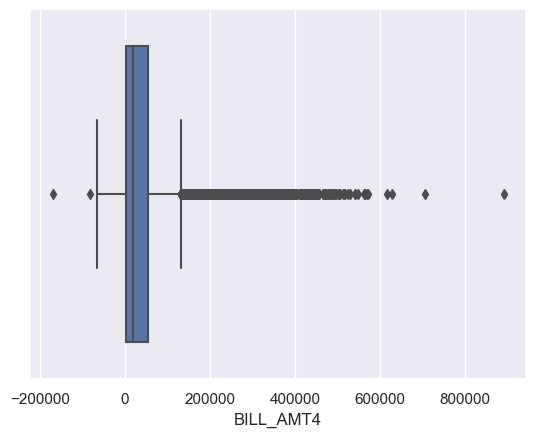

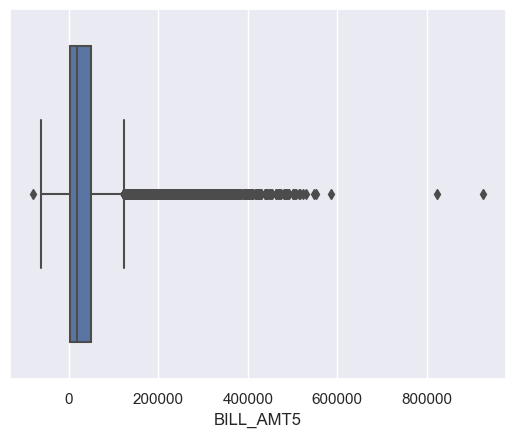

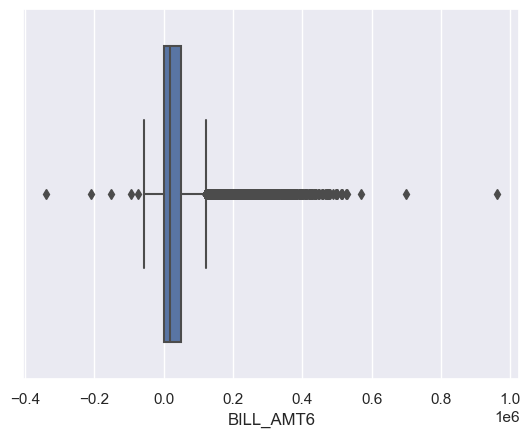

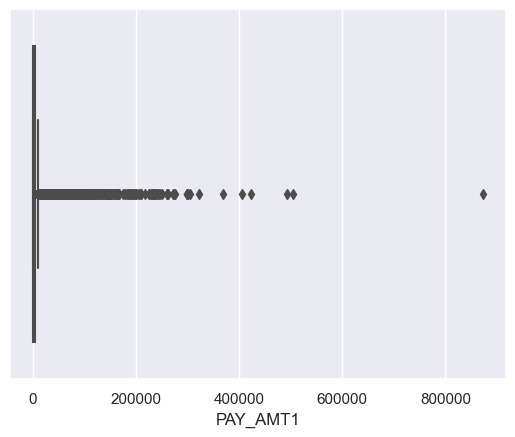

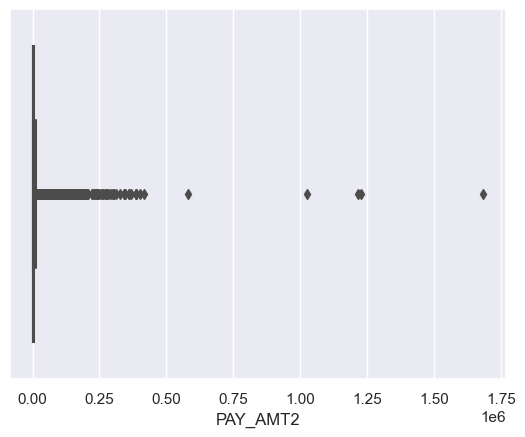

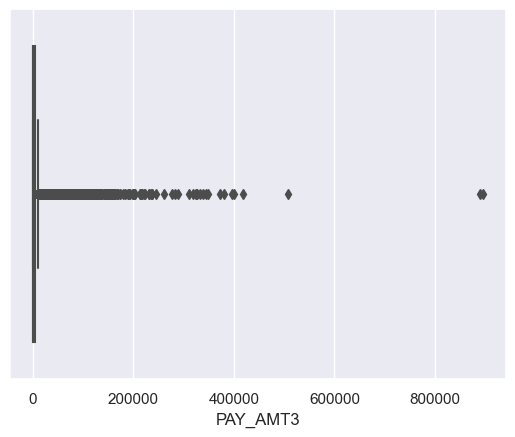

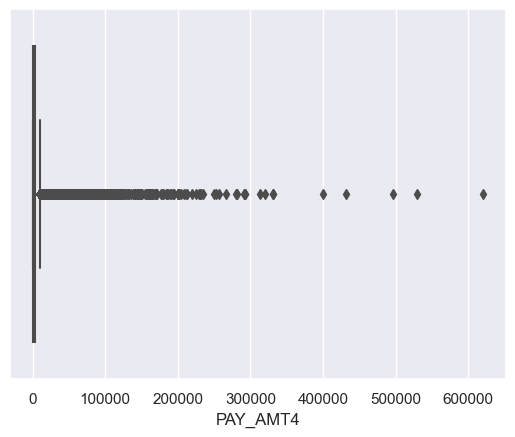

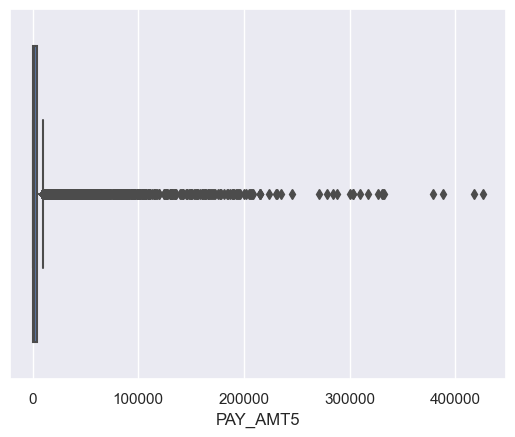

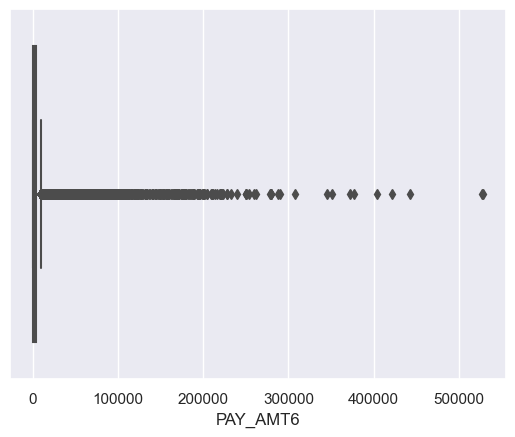

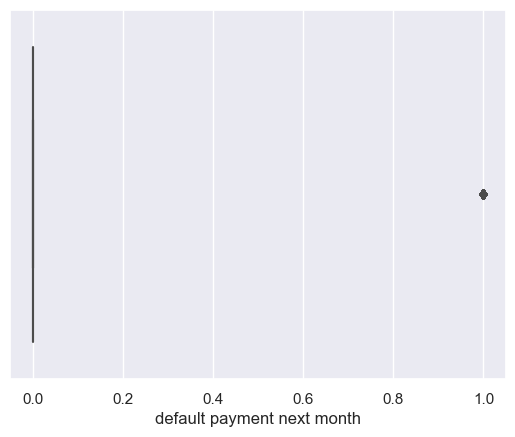

In [7]:
sns.set(style="darkgrid")
for i in data.columns:
    sns.boxplot(x=i, data=data)
    plt.show()

#### Insight
There are lots of outliers in the dataset.

 # <p style="padding:10px;background-color:#75C9EF ;margin:10;color:#1a0000;font-family:newtimeroman;font-size:50%;text-align:center;border-radius: 20px 20px ;overflow:hidden;font-weight:50">Bivariate Analysis</p>

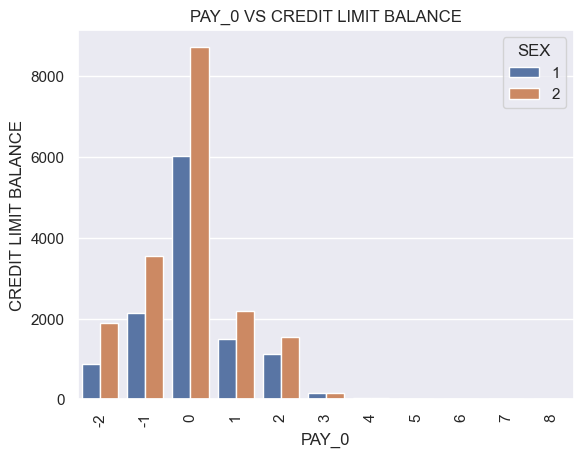

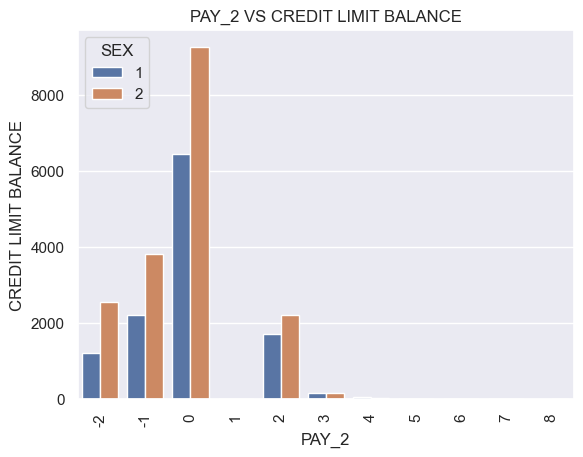

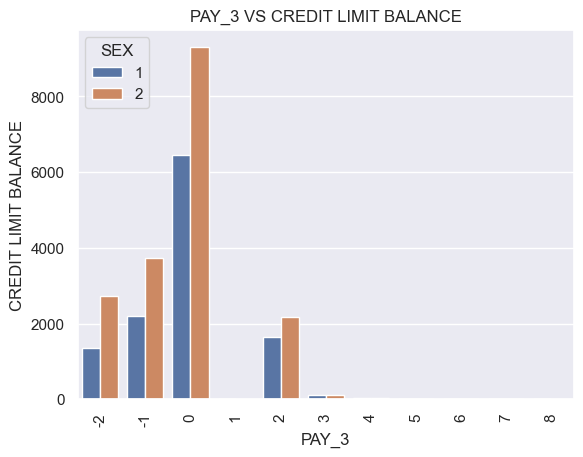

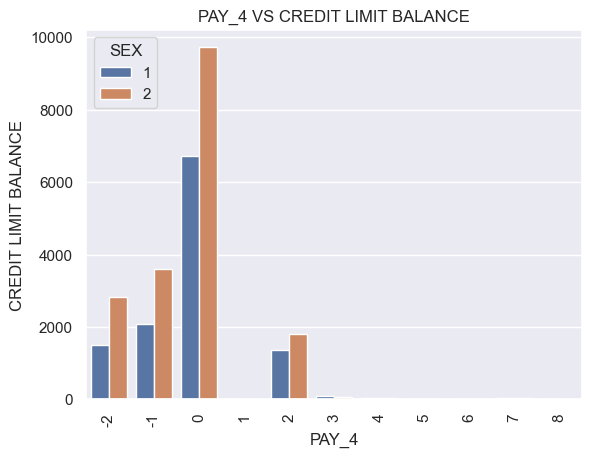

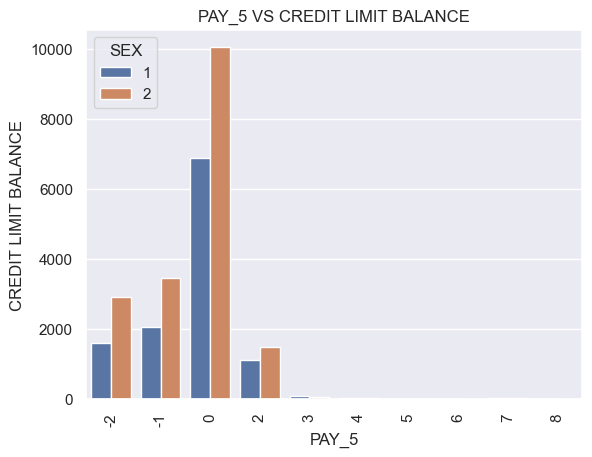

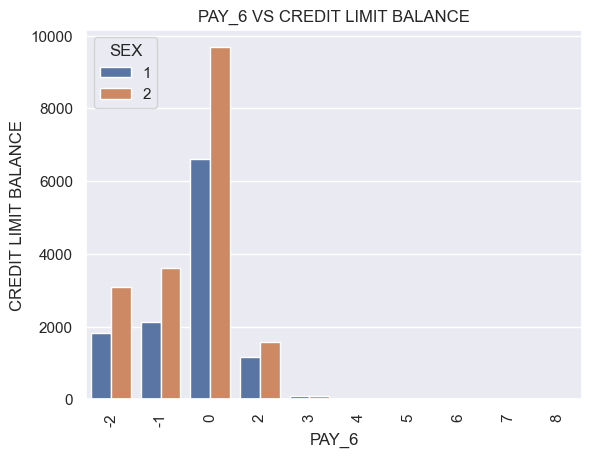

In [54]:
sns.set(style="darkgrid")
for i in data.columns[5:11]:
    sns.countplot(x=i, data=data, hue="SEX")
    plt.title(f"{i} VS CREDIT LIMIT BALANCE")
    plt.ylabel("CREDIT LIMIT BALANCE")
    plt.xticks(rotation=90)
    plt.show()

#### Insights
- Majority of the customer both male and female pay as at when due.

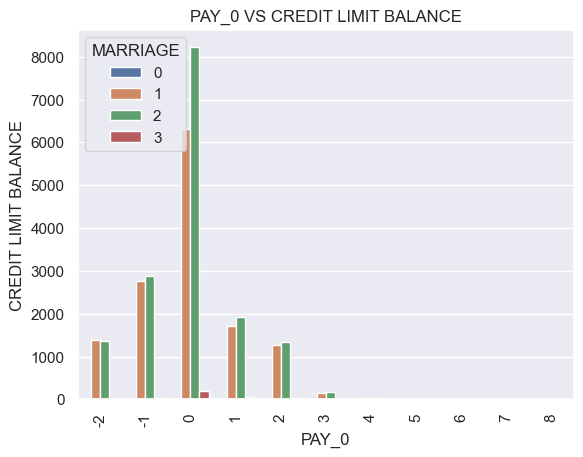

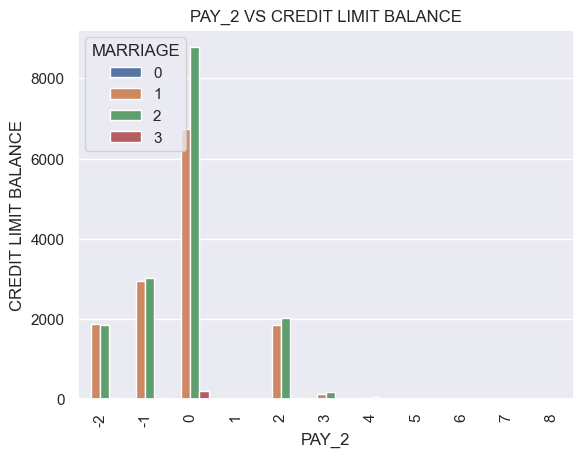

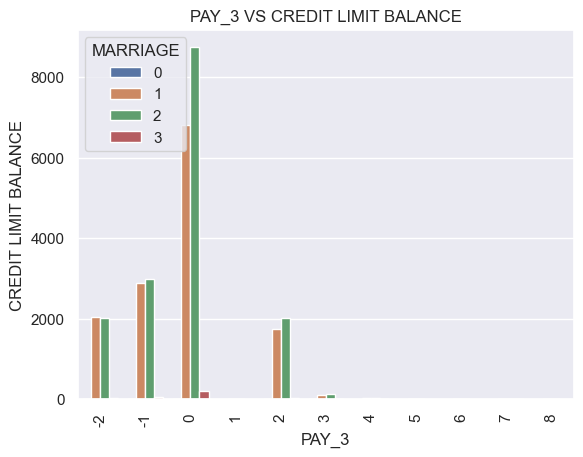

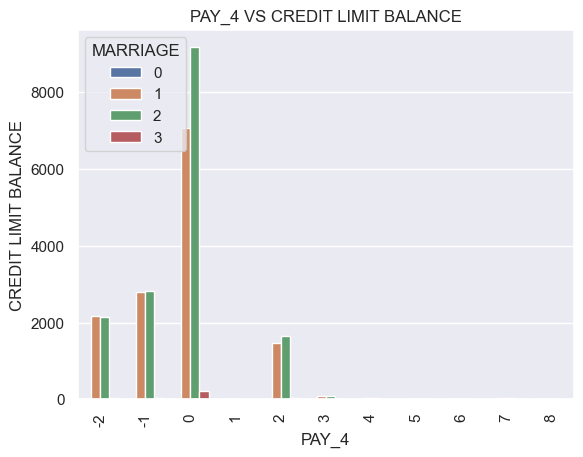

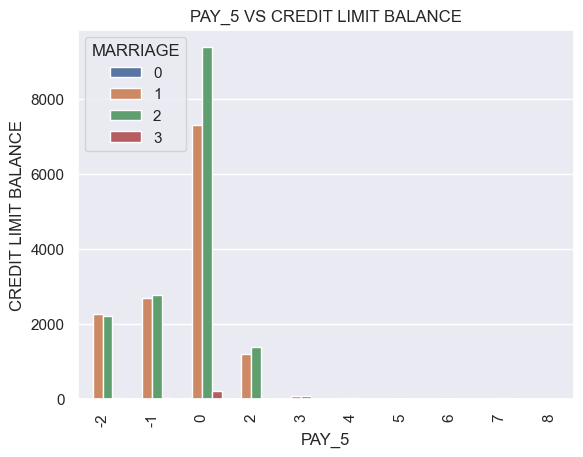

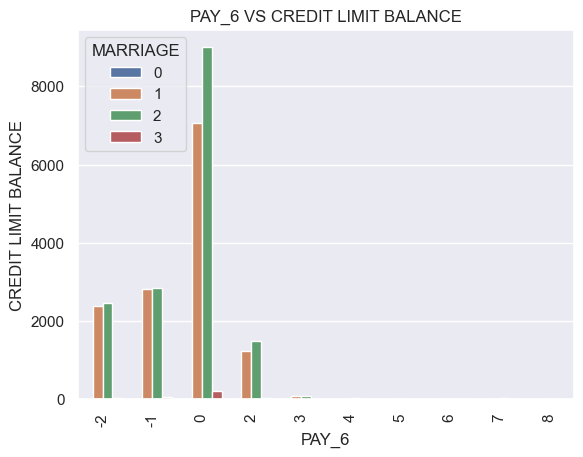

In [56]:
sns.set(style="darkgrid")
for i in data.columns[5:11]:
    sns.countplot(x=i, data=data, hue="MARRIAGE")
    plt.title(f"{i} VS CREDIT LIMIT BALANCE")
    plt.ylabel("CREDIT LIMIT BALANCE")
    plt.xticks(rotation=90)
    plt.show()

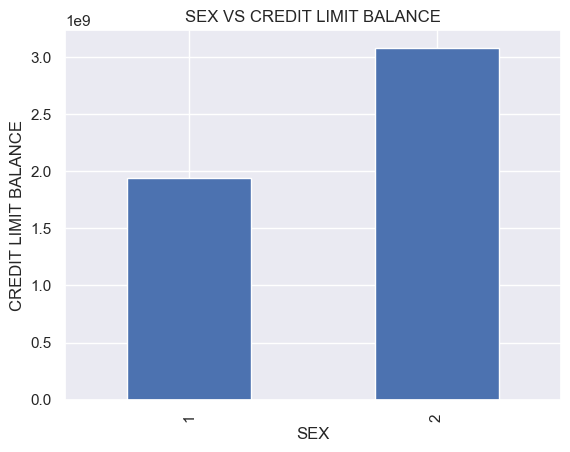

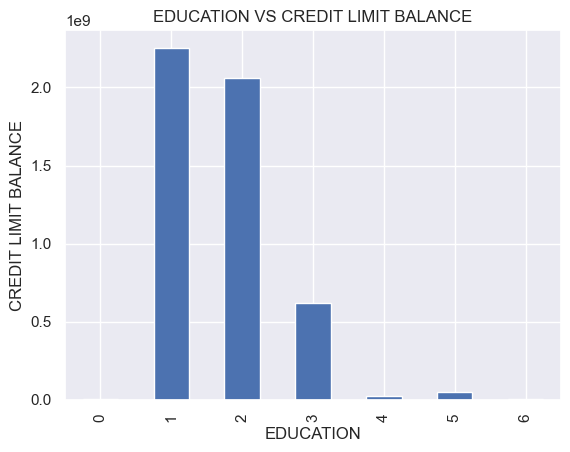

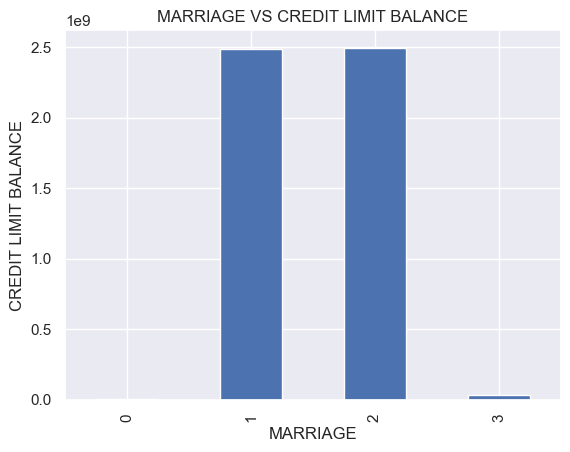

In [47]:
s asns.set(style="darkgrid")
for i in data.columns[1:4]:
    data.groupby(i)["LIMIT_BAL"].sum().plot(kind="bar")
    plt.title(f"{i} VS CREDIT LIMIT BALANCE")
    plt.ylabel("CREDIT LIMIT BALANCE")
    plt.xticks(rotation=90)
    plt.show()

#### Insights
- Bulk of the credits were advanced to female customers.
- More than 80 percent of the facility were given to graduate school and university customers.
- More than 99 percent of the credits were given to both married and single in almost equal proportion.

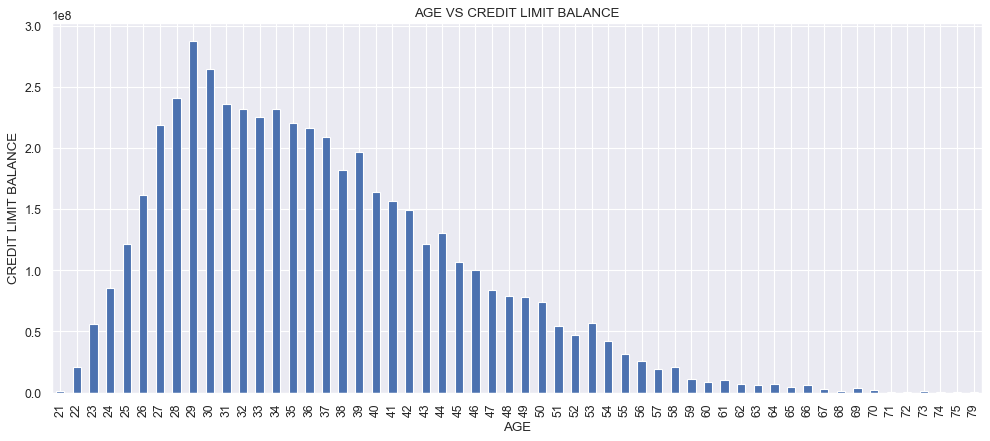

In [50]:
from matplotlib.pyplot import figure
figure(figsize=(15, 6), dpi=80)
data.groupby("AGE")["LIMIT_BAL"].sum().plot(kind="bar")
plt.title("AGE VS CREDIT LIMIT BALANCE")
plt.ylabel("CREDIT LIMIT BALANCE")
plt.xticks(rotation=90)
plt.show()

#### Insight
More than 60 percent of the facility were given to ages between 25 to 45

 # <p style="padding:10px;background-color:#75C9EF ;margin:10;color:#1a0000;font-family:newtimeroman;font-size:50%;text-align:center;border-radius: 20px 20px ;overflow:hidden;font-weight:50">Multivariate Analysis</p>

In [61]:
data.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


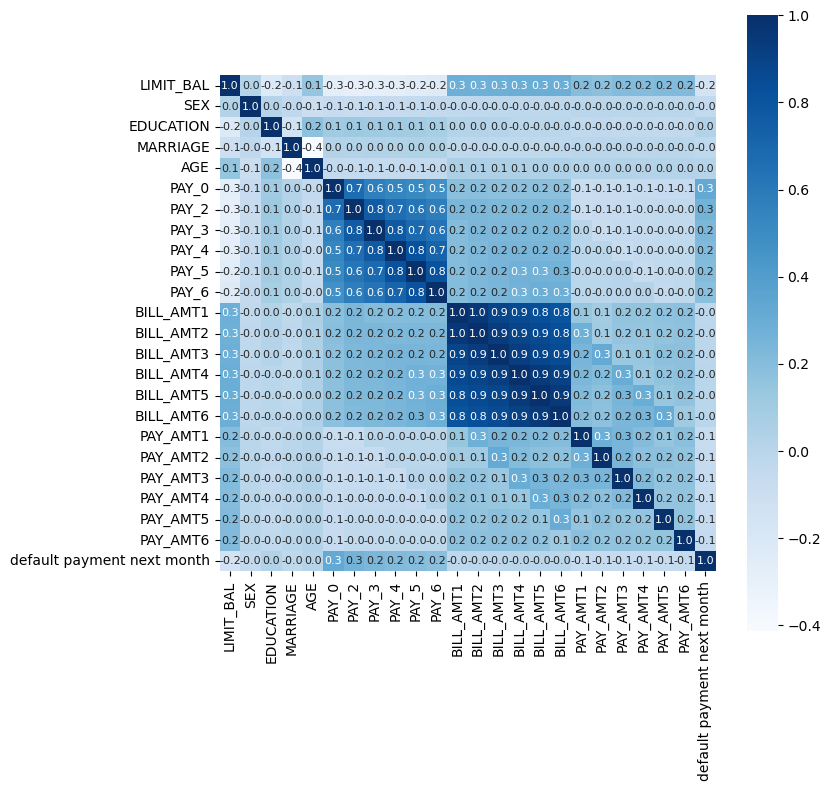

In [5]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

 # <p style="padding:10px;background-color:#75C9EF ;margin:10;color:#1a0000;font-family:newtimeroman;font-size:50%;text-align:center;border-radius: 20px 20px ;overflow:hidden;font-weight:50">Feature Engineering</p>

#### Feature Engineering involves handling the following 
- missing values - No Missing Value
- handling outlier
- handling categorical encoding - No Categorical Variable
- feature scaling
- feature selection


In [8]:
# There are no missing values in the dataset
data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [6]:
# Handling Outliers
def find_limits(df, variables):
    # Let us find the IQR (Inter Quantile Range)
    Q1 = df[variables].quantile(.25)
    Q3 = df[variables].quantile(.75)
    IQR = Q3 - Q1
    lower_limit = Q1-1.5*IQR
    upper_limit = Q3+1.5*IQR
    return lower_limit, upper_limit

In [7]:
# Calculating Lower and Upper Limit For columns And Capping Variables At Same
for col in df.columns[0:23]:
    lower_limit, upper_limit = find_limits(df,col)
    df[col]=np.where(df[col] > upper_limit, upper_limit,
                     np.where(df[col] < lower_limit, lower_limit, df[col]))
    print(f"For {col} variable: \n")
    print(f"The Lower Limit: {lower_limit}")
    print(f"The Upper Limit: {upper_limit}")
    print("============================================================================================")


For LIMIT_BAL variable: 

The Lower Limit: -235000.0
The Upper Limit: 525000.0
For SEX variable: 

The Lower Limit: -0.5
The Upper Limit: 3.5
For EDUCATION variable: 

The Lower Limit: -0.5
The Upper Limit: 3.5
For MARRIAGE variable: 

The Lower Limit: -0.5
The Upper Limit: 3.5
For AGE variable: 

The Lower Limit: 8.5
The Upper Limit: 60.5
For PAY_0 variable: 

The Lower Limit: -2.5
The Upper Limit: 1.5
For PAY_2 variable: 

The Lower Limit: -2.5
The Upper Limit: 1.5
For PAY_3 variable: 

The Lower Limit: -2.5
The Upper Limit: 1.5
For PAY_4 variable: 

The Lower Limit: -2.5
The Upper Limit: 1.5
For PAY_5 variable: 

The Lower Limit: -2.5
The Upper Limit: 1.5
For PAY_6 variable: 

The Lower Limit: -2.5
The Upper Limit: 1.5
For BILL_AMT1 variable: 

The Lower Limit: -91739.625
The Upper Limit: 162389.375
For BILL_AMT2 variable: 

The Lower Limit: -88547.5
The Upper Limit: 155538.5
For BILL_AMT3 variable: 

The Lower Limit: -83581.5
The Upper Limit: 146412.5
For BILL_AMT4 variable: 

The 

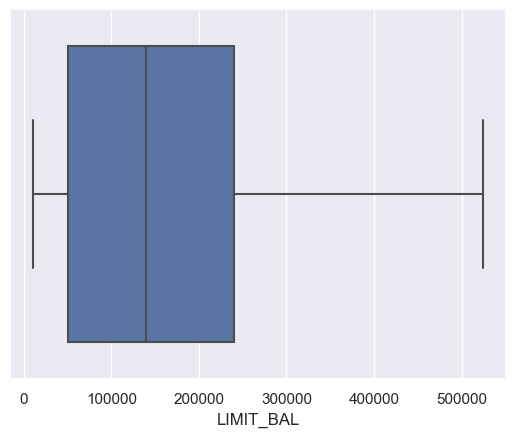

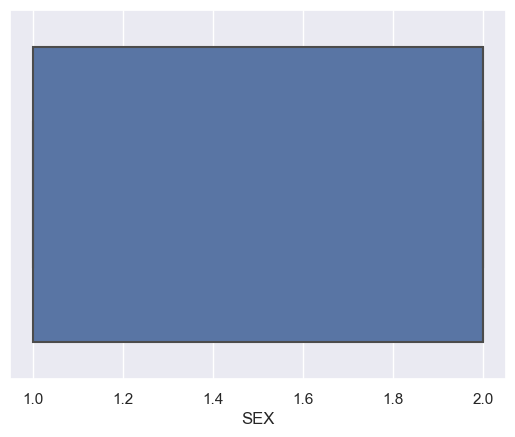

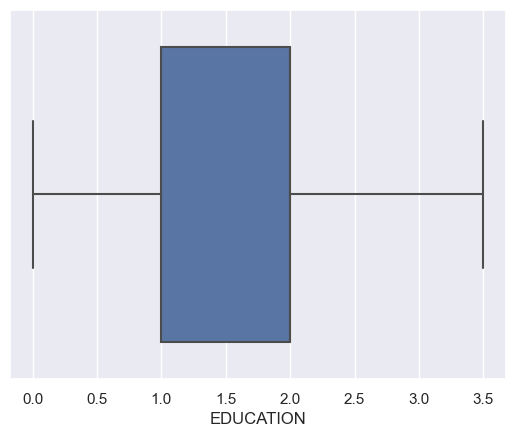

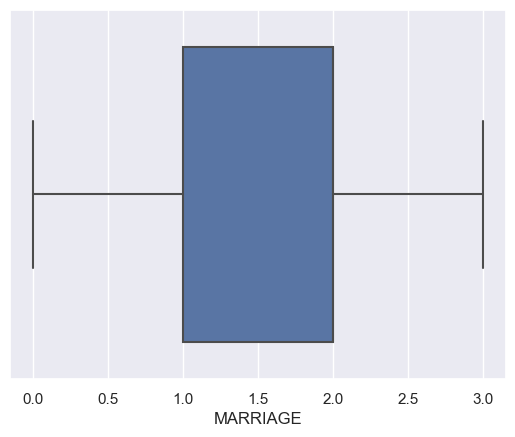

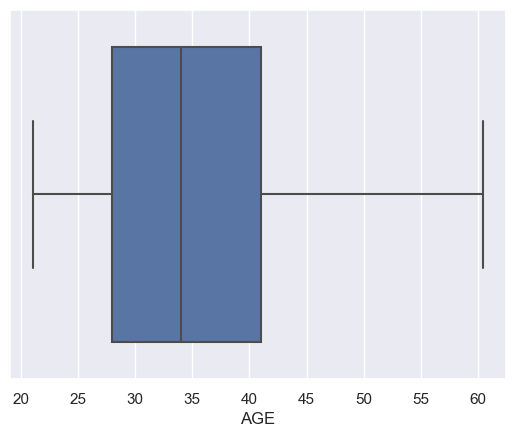

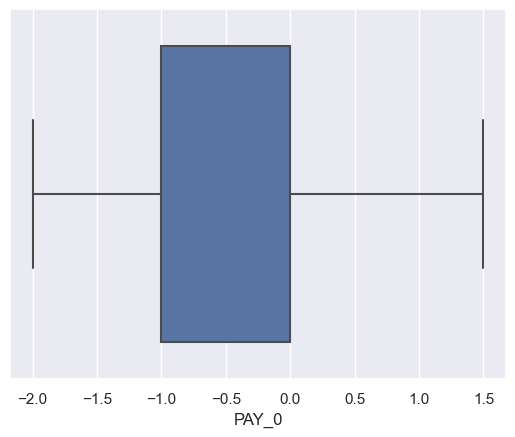

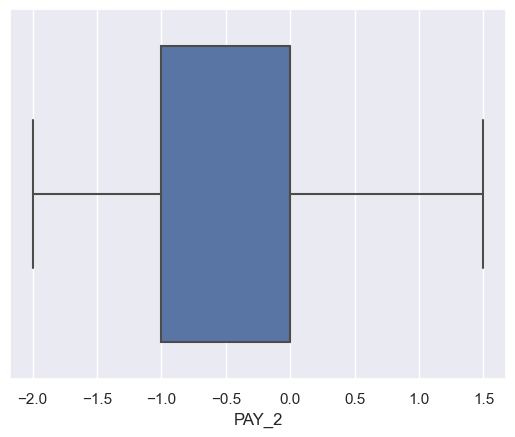

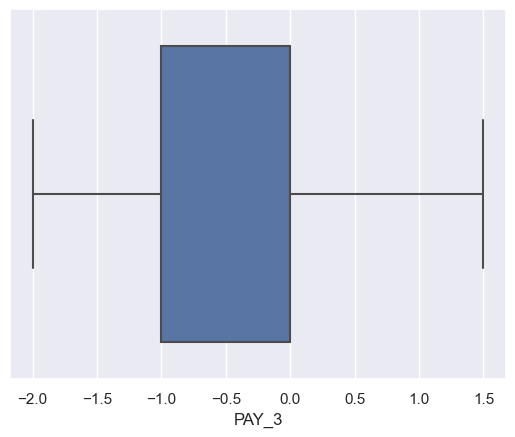

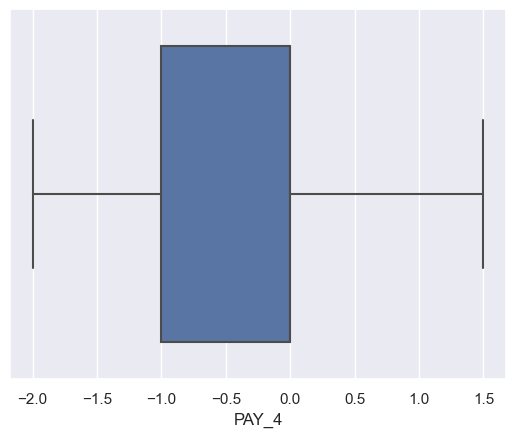

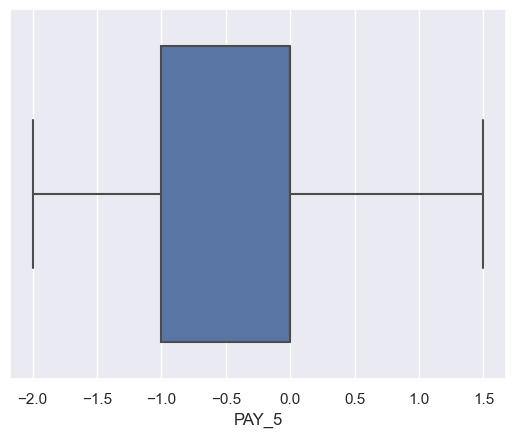

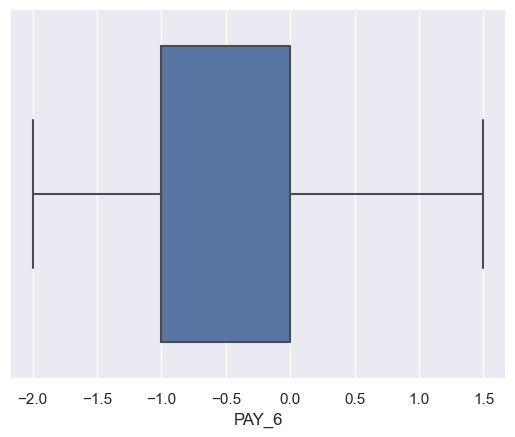

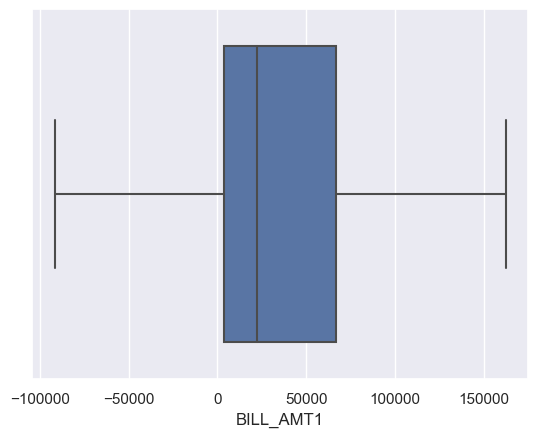

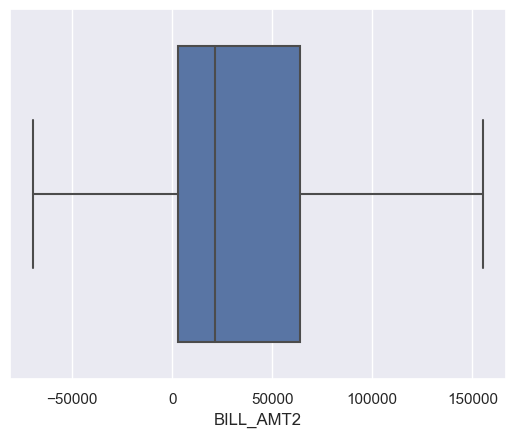

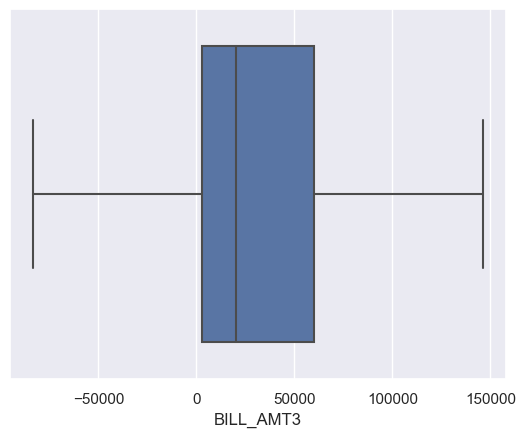

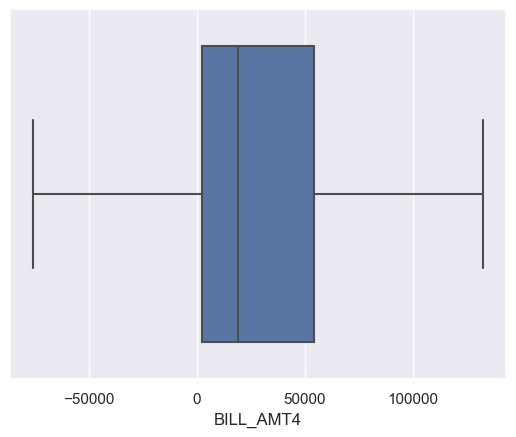

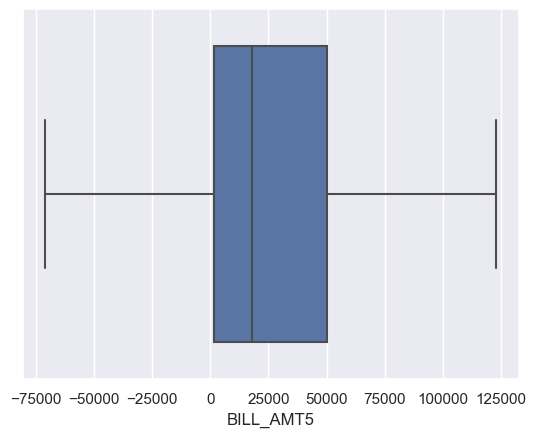

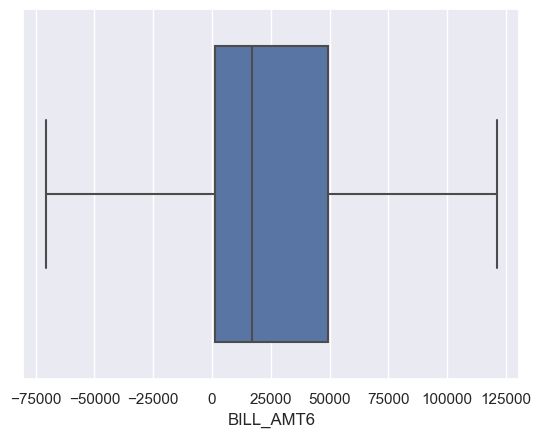

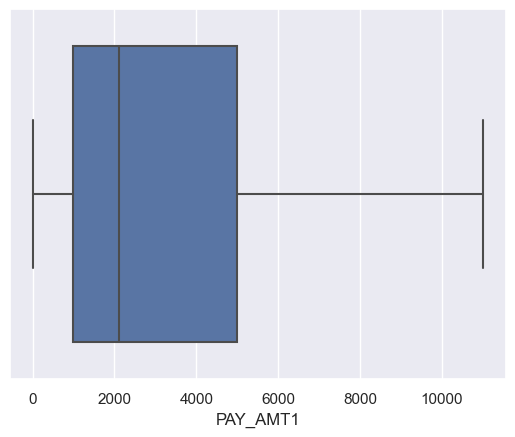

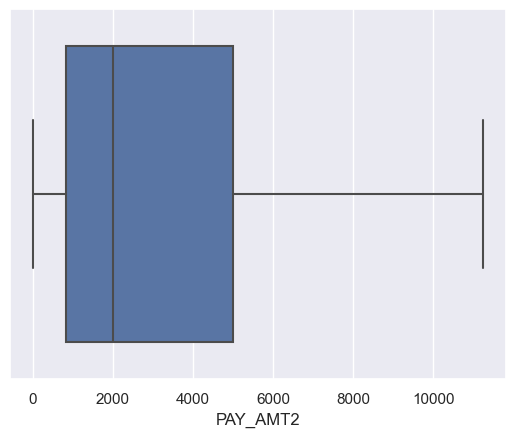

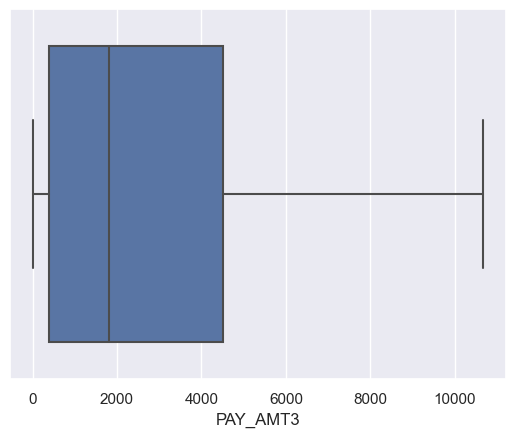

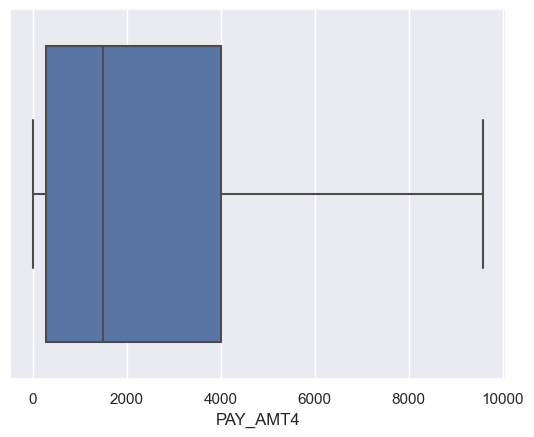

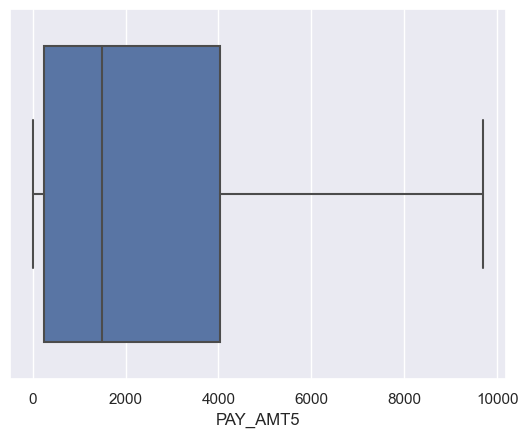

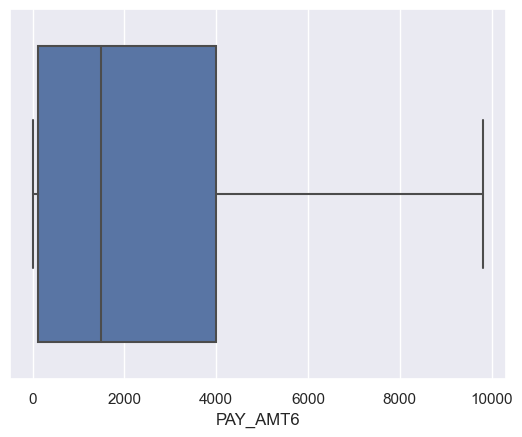

In [8]:
sns.set(style="darkgrid")
for i in df.columns[0:23]:
    sns.boxplot(x=i, data=df)
    plt.show()

#### Model Building, Hyper-parameter Tuning And Model Evaluation

In [19]:
# Import The Key Packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
# Spliting Dataset Into Dependent And Independent Features
X = df.drop("default payment next month", axis =1)
y = df["default payment next month"]

In [20]:
# Split Dataset Into Train And Test Splits
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [21]:
# Dataset Scaling And Standardisation
data_scaling = StandardScaler()
X_train =data_scaling.fit_transform(X_train)
X_test = data_scaling.transform(X_test)


In [22]:
X_train

array([[-0.67739393,  0.80815856,  0.22948545, ..., -0.48492216,
        -0.41463358, -0.58397358],
       [-1.06798974, -1.23738094,  0.22948545, ..., -0.57057323,
        -0.8820073 , -0.86521593],
       [ 0.10379769,  0.80815856,  2.29692198, ...,  1.35934392,
         2.25538032, -0.8069174 ],
       ...,
       [-0.91175142, -1.23738094, -1.14880556, ..., -0.88158755,
        -0.8820073 , -0.86521593],
       [-0.7555131 ,  0.80815856,  0.22948545, ..., -0.49078421,
        -0.8820073 , -0.48083004],
       [-0.05244064,  0.80815856,  0.22948545, ..., -0.34423296,
         2.25538032, -0.38473356]])

In [23]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"X_train shape: {y_train.shape}")
print(f"X_test shape: {y_test.shape}")

X_train shape: (24000, 23)
X_test shape: (6000, 23)
X_train shape: (24000,)
X_test shape: (6000,)


#### Logistic Regression Without Hyper-parameter

In [24]:
# Model Building
log_regression=LogisticRegression(verbose=False)
log_regression.fit(X_train, y_train)
y_pred = log_regression.predict(X_test)

In [25]:
# Model Evaluation
print("=============================================================================================")
print("Accuracy_Score")
print(accuracy_score(y_test, y_pred))
print("=============================================================================================")
print(classification_report(y_test, y_pred))

Accuracy_Score
0.8031666666666667
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      4687
           1       0.64      0.23      0.34      1313

    accuracy                           0.80      6000
   macro avg       0.73      0.60      0.61      6000
weighted avg       0.78      0.80      0.76      6000



#### Logistic Regression With Hyper-parameter Tunning Using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [27]:
param_grid = {
    "penalty": ["l1", "l2","elasticnet"],
    "C" : [0.001, 0.01, 0.1, 1, 10],
    "solver" : ["lbfgs", "liblinear", "newton-cg", "sag", "saga"],
    "max_iter" : [100, 300, 500,1000,1500]
}

In [28]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(log_regression, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

c:\Users\Tunde\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1000 fits failed out of a total of 1875.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Tunde\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Tunde\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Tunde\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(


GridSearchCV(cv=5, estimator=LogisticRegression(verbose=False), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [100, 300, 500, 1000, 1500],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                    'saga']},
             scoring='accuracy')

In [29]:
# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)


Best hyperparameters:  {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [30]:
# Train the model with the best hyperparameters
best_model = LogisticRegression(**grid_search.best_params_)
best_model.fit(X_train, y_train)

LogisticRegression(C=1, solver='liblinear')

In [31]:
# Evaluate the performance on the validation(test) set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on validation set: {:.2f}".format(accuracy))

Accuracy on validation set: 0.80


#### Logistic Regression With Hyper-parameter Tunning Using RandomizedSearchCV

In [36]:
# Perform random search with cross-validation
random_search = RandomizedSearchCV(log_regression, param_grid, cv=5, scoring='accuracy', n_jobs=-1, n_iter=20, random_state=42, verbose = False)
random_search.fit(X_train, y_train)


c:\Users\Tunde\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Tunde\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Tunde\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Tunde\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
Value

RandomizedSearchCV(cv=5, estimator=LogisticRegression(verbose=False), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10],
                                        'max_iter': [100, 300, 500, 1000, 1500],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy', verbose=False)

In [37]:
# Print the best hyperparameters
print("Best hyperparameters: ", random_search.best_params_)

Best hyperparameters:  {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 300, 'C': 10}


In [38]:
# Train the model with the best hyperparameters
best_model = LogisticRegression(**random_search.best_params_)
best_model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=300, penalty='l1', solver='liblinear')

In [39]:
# Evaluate the performance on the validation set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on validation set: {:.2f}".format(accuracy))


Accuracy on validation set: 0.80
